> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# 1.2. Getting started with exploratory data analysis in IPython

We will download and process a dataset about attendance on Montreal's bicycle tracks. This example is largely inspired by a presentation from [Julia Evans](http://nbviewer.ipython.org/github/jvns/talks/blob/master/mtlpy35/pistes-cyclables.ipynb).

1. The very first step is to import the scientific packages we will be using in this recipe, namely NumPy, Pandas, and matplotlib. We also instruct matplotlib to render the figures as PNG images in the notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. Now, we create a new Python variable called `url` that contains the address to a CSV (**Comma-separated values**) data file. This standard text-based file format is used to store tabular data.

In [2]:
url = "https://github.com/ipython-books/cookbook-data/raw/master/bikes.csv"

3. Pandas defines a `read_csv` function that can read any CSV file. Here, we give it the URL to the file. Pandas will automatically download and parse the file, and return a `DataFrame` object. We need to specify a few options to make sure the dates are parsed correctly.

In [14]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
# df.to_csv('test.csv')

4. The `df` variable contains a `DataFrame` object, a specific Pandas data structure that contains 2D tabular data. The `head(n)` method displays the first `n` rows of this table.

In [12]:
df.head(2)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


Every row contains the number of bicycles on every track of the city, for every day of the year.

5. We can get some summary statistics of the table with the `describe` method.

In [13]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


6. Let's display some figures! We will plot the daily attendance of two tracks. First, we select the two columns `'Berri1'` and `'PierDup'`. Then, we call the `plot` method.

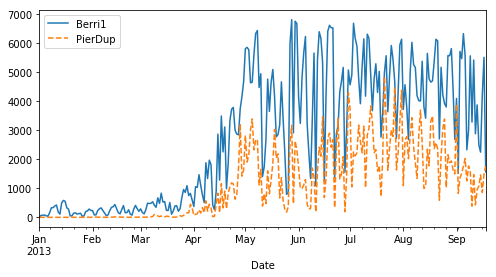

In [6]:
# The styling '-' and '--' is just to make the figure
# readable in the black & white printed version of this book.
df[['Berri1', 'PierDup']].plot(figsize=(8,4),
                               style=['-', '--']);

7. Now, we move to a slightly more advanced analysis. We will look at the attendance of all tracks as a function of the weekday. We can get the week day easily with Pandas: the `index` attribute of the `DataFrame` contains the dates of all rows in the table. This index has a few date-related attributes, including `weekday`.

In [7]:
df.index.weekday

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='Date', length=261)

However, we would like to have names (Monday, Tuesday, etc.) instead of numbers between 0 and 6. This can be done easily. First, we create an array `days` with all weekday names. Then, we index it by `df.index.weekday`. This operation replaces every integer in the index by the corresponding name in `days`. The first element, `Monday`, has index 0, so every 0 in `df.index.weekday` is replaced by `Monday`, and so on. We assign this new index to a new column `Weekday` in the `DataFrame`.

In [27]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
df['Weekday'] = days[df.index.weekday]

8. To get the attendance as a function of the weekday, we need to group the table by the weekday. The `groupby` method lets us do just that. Once grouped, we can sum all rows in every group.

In [28]:
df_week = df.groupby('Weekday').sum()

In [29]:
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Weekday,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


9. We can now display this information in a figure. We first need to reorder the table by the weekday using `ix` (indexing operation). Then, we plot the table, specifying the line width and the figure size.

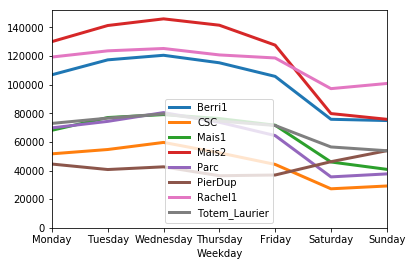

In [35]:
df_week.loc[days].plot(lw=3, figsize=(6,4));
plt.ylim(0);  # Set the bottom axis to 0.

10. Finally, let's illustrate the new interactive capabilities of the notebook in IPython 2.0. We will plot a *smoothed* version of the track attendance as a function of time (**rolling mean**). The idea is to compute the mean value in the neighborhood of any day. The larger the neighborhood, the smoother the curve. We will create an interactive slider in the notebook to vary this parameter in real-time in the plot.

In [36]:
from ipywidgets import interact
#from IPython.html.widgets import interact # IPython < 4.x
@interact
def plot(n=(1, 30)):
    plt.figure(figsize=(8,4));
    pd.rolling_mean(df['Berri1'], n).dropna().plot();
    plt.ylim(0, 8000);
    plt.show();

A Jupyter Widget

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).

In [48]:
from ipywidgets import interact
#from IPython.html.widgets import interact # IPython < 4.x
@interact
def plot(n=(2, 30, 2)):
    plt.figure(figsize=(8,4));
    print(n)
    pd.Series.rolling(df['Berri1'], n).mean().plot();
#     df['Berri1'].rolling(window=16, center=False).mean()
    plt.ylim(0, 8000);
    plt.show();

A Jupyter Widget